In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error

file_path = 'EGLL_2023-04-01_00-00_till_2023-08-31_23-30.csv'
df = pd.read_csv(file_path)

df_model1 = df[['Holding Time (minutes)', 'Big', 'Ock', 'Bov', 'Lam', 'WTC L', 'WTC M', 'WTC H','WTC J', 'Engine Jet', 'Engine Turboprop/shaft','Ceiling at -0', 'Wind at -0', 'Precip at -0', 'Freezing at -0','Phenomena at -0', 'day','month', 'Day_0', 'Day_1','Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Decimal Hours -0','Holding flights at -0', 'Runway 09L', 'Runway 09R', 'Runway 27L', 'Runway 27R','Crosswind Component at -0', 'Headwind Component at -0','No of Landings 1HR at -0', 'Ground Speed at -0', 'Track at -0','Altitude at -0', 'Departures delayIndex at -0','Arrivals numCancelled at -0', 'Arrivals delayIndex at -0']]
df_model2 = df[['Holding Time (minutes)', 'Big', 'Ock', 'Bov', 'Lam', 'WTC L', 'WTC M', 'WTC H','WTC J', 'Engine Jet', 'Engine Turboprop/shaft','Ceiling at -30', 'Wind at -30', 'Precip at -30', 'Freezing at -30','Phenomena at -30', 'day','month', 'Day_0', 'Day_1','Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Decimal Hours -30','Holding flights at -30', 'Runway 09L', 'Runway 09R', 'Runway 27L', 'Runway 27R','Crosswind Component at -30', 'Headwind Component at -30','No of Landings 1HR at -30', 'Ground Speed at -30', 'Track at -30','Altitude at -30', 'Departures delayIndex at -30','Arrivals numCancelled at -30', 'Arrivals delayIndex at -30']]
df_model3 = df[['Holding Time (minutes)', 'Big', 'Ock', 'Bov', 'Lam', 'WTC L', 'WTC M', 'WTC H','WTC J', 'Engine Jet', 'Engine Turboprop/shaft','Ceiling at -60', 'Wind at -60', 'Precip at -60', 'Freezing at -60','Phenomena at -60', 'day','month', 'Day_0', 'Day_1','Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Decimal Hours -60','Holding flights at -60', 'Runway 09L', 'Runway 09R', 'Runway 27L', 'Runway 27R','Crosswind Component at -60', 'Headwind Component at -60','No of Landings 1HR at -60', 'Ground Speed at -60', 'Track at -60','Altitude at -60', 'Departures delayIndex at -60','Arrivals numCancelled at -60', 'Arrivals delayIndex at -60']]
df_model_all=df[['Holding Time (minutes)','Big', 'Ock', 'Bov', 'Lam', 'WTC L', 'WTC M', 'WTC H','WTC J', 'Engine Jet', 'Engine Turboprop/shaft',
                'Ceiling at -0', 'Wind at -0', 'Precip at -0', 'Freezing at -0','Phenomena at -0','Ceiling at -30', 'Wind at -30', 'Precip at -30', 'Freezing at -30','Phenomena at -30','Ceiling at -60', 'Wind at -60', 'Precip at -60', 'Freezing at -60','Phenomena at -60', 'day','month', 'Day_0', 'Day_1','Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Decimal Hours -0','Holding flights at -0', 'Holding flights at -30','Holding flights at -60', 'Runway 09L', 'Runway 09R', 'Runway 27L', 'Runway 27R','Crosswind Component at -0', 'Headwind Component at -0','Crosswind Component at -30', 'Headwind Component at -30','Crosswind Component at -60', 'Headwind Component at -60','No of Landings 1HR at -0', 'No of Landings 1HR at -30','No of Landings 1HR at -60', 'Ground Speed at -0', 'Track at -0',
                'Altitude at -0', 'Ground Speed at -30', 'Track at -30','Altitude at -30', 'Ground Speed at -60', 'Track at -60','Altitude at -60', 'Departures delayIndex at -0','Arrivals numCancelled at -0', 'Arrivals delayIndex at -0','Departures delayIndex at -30', 'Arrivals numCancelled at -30','Arrivals delayIndex at -30', 'Departures delayIndex at -60','Arrivals numCancelled at -60', 'Arrivals delayIndex at -60']]


In [4]:

data=df_model1
# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features and target variable
X = data.drop(columns=['Holding Time (minutes)'])
y = data['Holding Time (minutes)']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 5
X_sequences, y_sequences = create_sequences(X_scaled, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model and calculate RMSE, MAE, and MAPE on the test set
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_26276\3995066304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)


Epoch 1/100


C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 11.2513 - val_loss: 8.8755
Epoch 2/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 9.0963 - val_loss: 8.4531
Epoch 3/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.4707 - val_loss: 8.3602
Epoch 4/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.6455 - val_loss: 8.1326
Epoch 5/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.1489 - val_loss: 8.1081
Epoch 6/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.1218 - val_loss: 8.1777
Epoch 7/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.9957 - val_loss: 8.6838
Epoch 8/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.9405 - val_loss: 8.0697
Epoch 9/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.9389 - val_loss: 8.1499
Epoch 10/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.7723 - val_loss: 7.9619
Epoch 11/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.7720 - val_loss: 7.9382
Epoch 12/100
1974/1974 ━━━━━━━

C:\Users\mic__\AppData\Local\Temp\ipykernel_26276\3995066304.py:49: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100


In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Permutation Importance

def calculate_C(model, X_test, y_test, feature_names):
    baseline_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    importances = []

    for i in range(X_test.shape[2]):
        X_permuted = X_test.copy()
        np.random.shuffle(X_permuted[:, :, i])  # Shuffle values of the ith feature
        permuted_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_permuted)))
        importance = permuted_rmse - baseline_rmse
        importances.append((feature_names[i], importance))

    return sorted(importances, key=lambda x: x[1], reverse=True)

feature_names = X.columns
importances = calculate_permutation_importance(model, X_test, y_test, feature_names)
print("Feature Importance (Permutation):")
for feature, importance in importances:
    print(f"{feature}: {importance}")


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━

In [6]:
importances

[('Holding flights at -0', 0.9785421838351569),
 ('Runway 09L', 0.41638023463657614),
 ('Departures delayIndex at -0', 0.16787431323630253),
 ('Decimal Hours -0', 0.16767757668091443),
 ('Big', 0.1122798625487027),
 ('Runway 27R', 0.05754634879713505),
 ('No of Landings 1HR at -0', 0.056980594353576386),
 ('Bov', 0.053613459372239713),
 ('Ground Speed at -0', 0.04998161925980016),
 ('WTC M', 0.031221352836798832),
 ('Runway 27L', 0.030994072753723234),
 ('Day_4', 0.02906716322847469),
 ('Crosswind Component at -0', 0.023559796768463315),
 ('WTC H', 0.023268447517733826),
 ('Lam', 0.02029707380008894),
 ('Ock', 0.018849434908614793),
 ('Day_5', 0.01671151317306485),
 ('day', 0.016336435203811117),
 ('month', 0.015009221491675273),
 ('Day_0', 0.014959541105244334),
 ('Day_3', 0.01470103752383567),
 ('Track at -0', 0.012774708998226192),
 ('Day_2', 0.01174112982906772),
 ('Arrivals delayIndex at -0', 0.011267722083880383),
 ('Ceiling at -0', 0.010718691456101936),
 ('Wind at -0', 0.008632

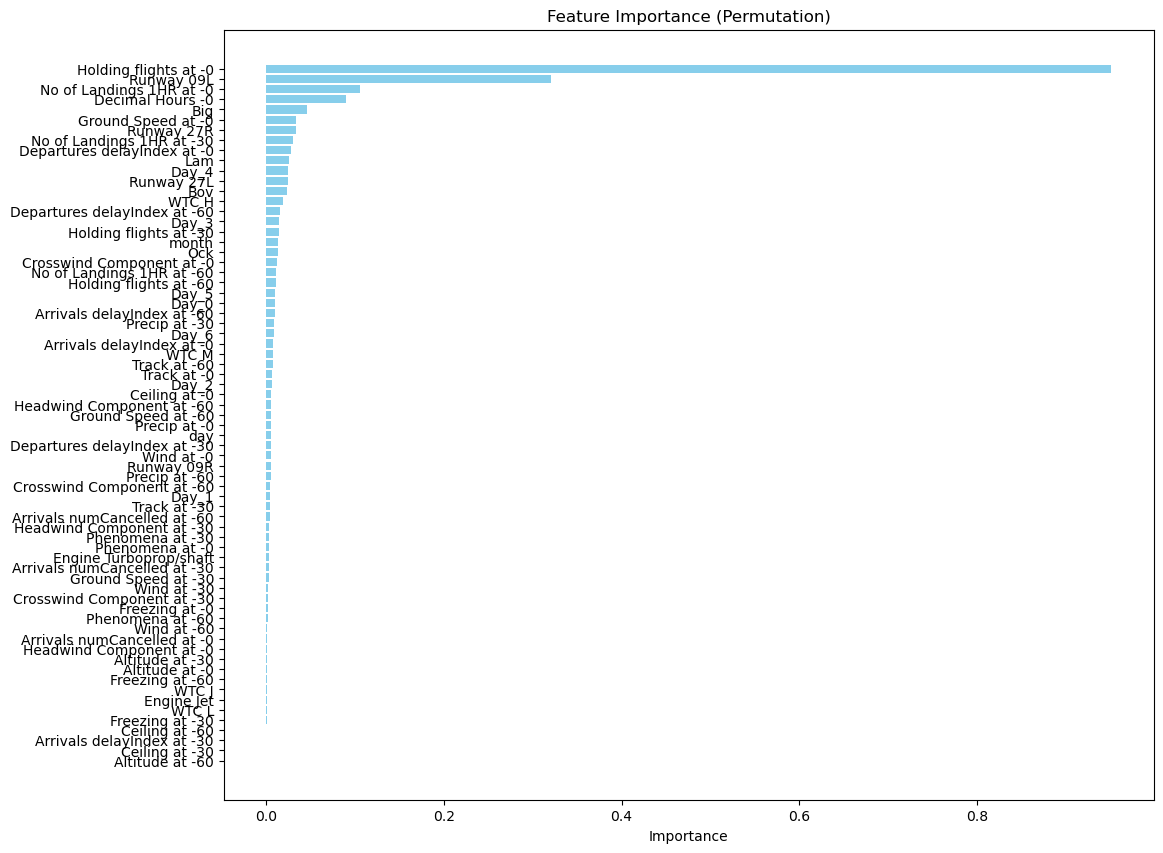

In [20]:

# Plot feature importance as a horizontal bar chart
features, importances = zip(*[(str(f), float(i)) for f, i in importances])
plt.figure(figsize=(12, 10))
plt.barh(list(features), list(importances), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()


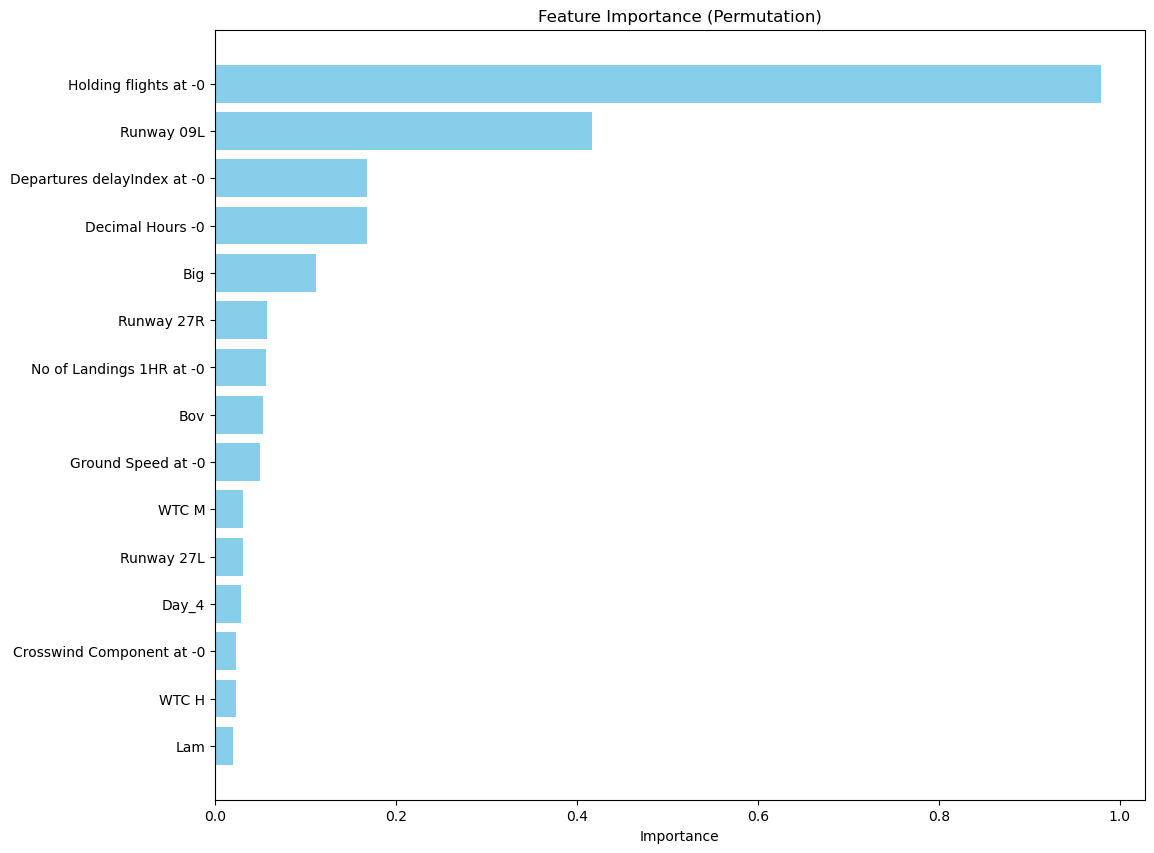

In [7]:
import matplotlib.pyplot as plt


features, importances = zip(*[(str(f), float(i)) for f, i in importances])

# Create a list of features and their importances
feature_importances = list(zip(features, importances))

# Sort the features by their importances in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Select the top 15 features
top_15_features, top_15_importances = zip(*feature_importances[:15])

# Plot the feature importance as a horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(list(top_15_features), list(top_15_importances), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()


In [8]:
data=df_model2
# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features and target variable
X = data.drop(columns=['Holding Time (minutes)'])
y = data['Holding Time (minutes)']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 5
X_sequences, y_sequences = create_sequences(X_scaled, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model and calculate RMSE, MAE, and MAPE on the test set
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_26276\1487208293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)


Epoch 1/100


C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1974/1974 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 12.3371 - val_loss: 10.9406
Epoch 2/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 10.6093 - val_loss: 10.5384
Epoch 3/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 10.4992 - val_loss: 10.3696
Epoch 4/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 10.0648 - val_loss: 10.0826
Epoch 5/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 10.0711 - val_loss: 10.3488
Epoch 6/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 9.6759 - val_loss: 9.8595
Epoch 7/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 9.5923 - val_loss: 9.7693
Epoch 8/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 9.6708 - val_loss: 9.6588
Epoch 9/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 9.4343 - val_loss: 9.5045
Epoch 10/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 9.3366 - val_loss: 9.4090
Epoch 11/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 9.1498 - val_loss: 9.2617
Epoch 12/100
1

C:\Users\mic__\AppData\Local\Temp\ipykernel_26276\1487208293.py:49: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100


In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Permutation Importance

def calculate_permutation_importance(model, X_test, y_test, feature_names):
    baseline_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    importances = []

    for i in range(X_test.shape[2]):
        X_permuted = X_test.copy()
        np.random.shuffle(X_permuted[:, :, i])  # Shuffle values of the ith feature
        permuted_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_permuted)))
        importance = permuted_rmse - baseline_rmse
        importances.append((feature_names[i], importance))

    return sorted(importances, key=lambda x: x[1], reverse=True)

feature_names = X.columns
importances = calculate_permutation_importance(model, X_test, y_test, feature_names)
print("Feature Importance (Permutation):")
for feature, importance in importances:
    print(f"{feature}: {importance}")


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━

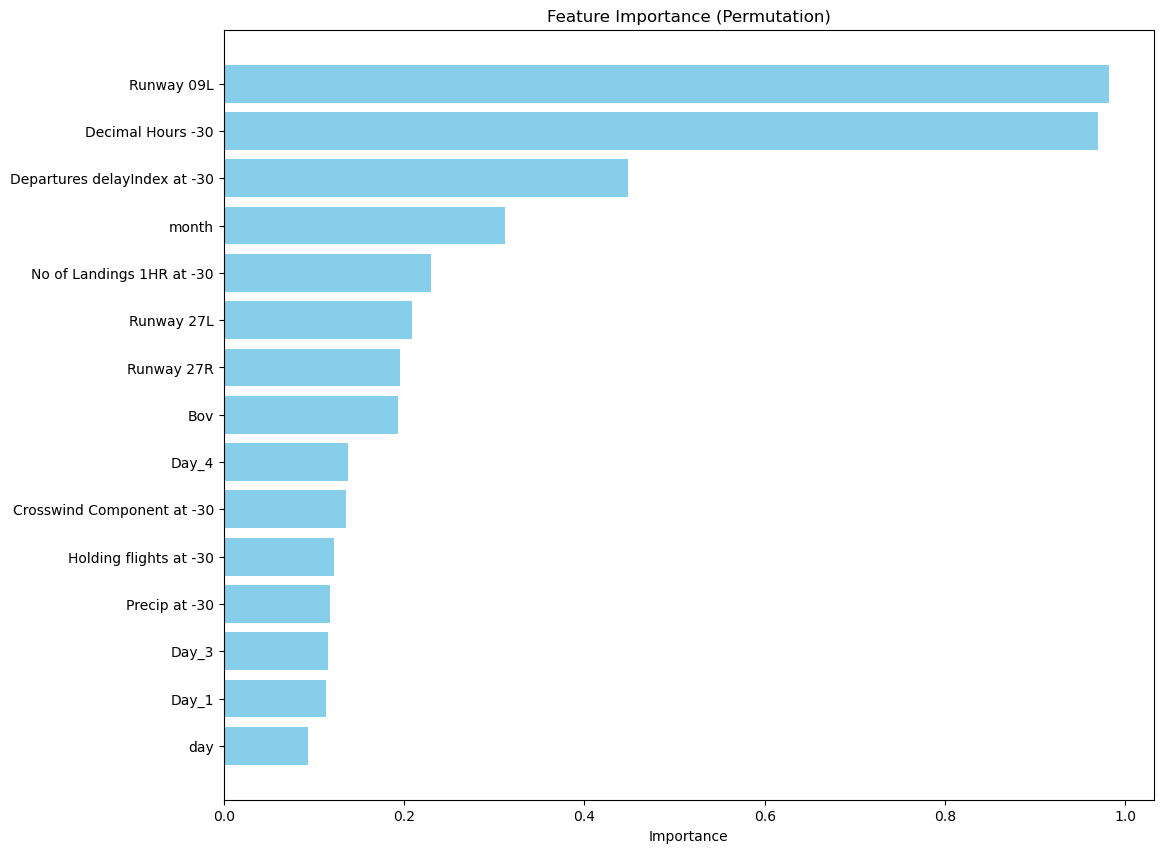

In [10]:
import matplotlib.pyplot as plt


features, importances = zip(*[(str(f), float(i)) for f, i in importances])

# Create a list of features and their importances
feature_importances = list(zip(features, importances))

# Sort the features by their importances in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Select the top 15 features
top_15_features, top_15_importances = zip(*feature_importances[:15])

# Plot the feature importance as a horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(list(top_15_features), list(top_15_importances), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()


In [11]:
data=df_model3
# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features and target variable
X = data.drop(columns=['Holding Time (minutes)'])
y = data['Holding Time (minutes)']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 5
X_sequences, y_sequences = create_sequences(X_scaled, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model and calculate RMSE, MAE, and MAPE on the test set
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_26276\3276825826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)


Epoch 1/100


C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1974/1974 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 13.2402 - val_loss: 11.3366
Epoch 2/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 11.0412 - val_loss: 10.9238
Epoch 3/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 10.7844 - val_loss: 10.6180
Epoch 4/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 10.3224 - val_loss: 10.5454
Epoch 5/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 10.0467 - val_loss: 10.1070
Epoch 6/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 9.9668 - val_loss: 10.2930
Epoch 7/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 9.5578 - val_loss: 9.7550
Epoch 8/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 9.4792 - val_loss: 9.8457
Epoch 9/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 9.5141 - val_loss: 9.5496
Epoch 10/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 9.3404 - val_loss: 9.5235
Epoch 11/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 9.1940 - val_loss: 9.3799
Epoch 12/100
1

C:\Users\mic__\AppData\Local\Temp\ipykernel_26276\3276825826.py:49: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100


In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Permutation Importance

def calculate_permutation_importance(model, X_test, y_test, feature_names):
    baseline_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    importances = []

    for i in range(X_test.shape[2]):
        X_permuted = X_test.copy()
        np.random.shuffle(X_permuted[:, :, i])  # Shuffle values of the ith feature
        permuted_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_permuted)))
        importance = permuted_rmse - baseline_rmse
        importances.append((feature_names[i], importance))

    return sorted(importances, key=lambda x: x[1], reverse=True)

feature_names = X.columns
importances = calculate_permutation_importance(model, X_test, y_test, feature_names)
print("Feature Importance (Permutation):")
for feature, importance in importances:
    print(f"{feature}: {importance}")


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━

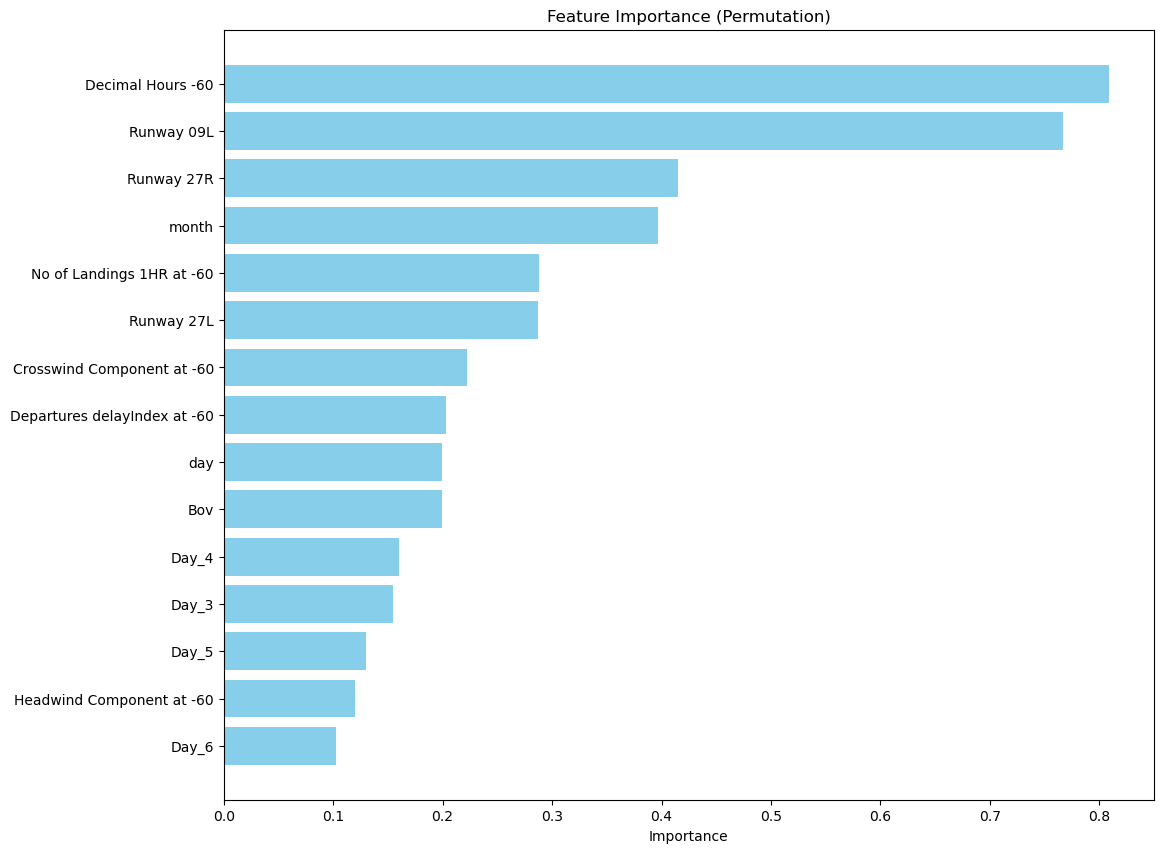

In [13]:
import matplotlib.pyplot as plt


features, importances = zip(*[(str(f), float(i)) for f, i in importances])

# Create a list of features and their importances
feature_importances = list(zip(features, importances))

# Sort the features by their importances in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Select the top 15 features
top_15_features, top_15_importances = zip(*feature_importances[:15])

# Plot the feature importance as a horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(list(top_15_features), list(top_15_importances), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()


In [14]:
data=df_model_all
# Data cleaning and preprocessing
data.fillna(data.median(numeric_only=True), inplace=True)

# Prepare features and target variable
X = data.drop(columns=['Holding Time (minutes)'])
y = data['Holding Time (minutes)']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences
def create_sequences(data, target, time_steps=1):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        targets.append(target.iloc[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 5
X_sequences, y_sequences = create_sequences(X_scaled, y, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model and calculate RMSE, MAE, and MAPE on the test set
predictions = model.predict(X_test)
rmse = tf.sqrt(tf.reduce_mean(tf.square(predictions - y_test))).numpy()
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

C:\Users\mic__\AppData\Local\Temp\ipykernel_26276\246732204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)


Epoch 1/100


C:\Users\mic__\.conda\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1974/1974 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 11.1000 - val_loss: 8.6389
Epoch 2/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 8.5719 - val_loss: 8.4969
Epoch 3/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 8.4077 - val_loss: 8.2053
Epoch 4/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 8.1583 - val_loss: 8.9990
Epoch 5/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 8.0896 - val_loss: 8.1526
Epoch 6/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.9533 - val_loss: 8.3655
Epoch 7/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.7973 - val_loss: 8.0533
Epoch 8/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.8653 - val_loss: 7.8980
Epoch 9/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.9708 - val_loss: 8.0237
Epoch 10/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.7352 - val_loss: 7.9101
Epoch 11/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.7326 - val_loss: 7.9588
Epoch 12/100
1974/1974 ━━━━━━

C:\Users\mic__\AppData\Local\Temp\ipykernel_26276\246732204.py:49: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - predictions.flatten()) / y_test)) * 100


In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Permutation Importance

def calculate_permutation_importance(model, X_test, y_test, feature_names):
    baseline_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    importances = []

    for i in range(X_test.shape[2]):
        X_permuted = X_test.copy()
        np.random.shuffle(X_permuted[:, :, i])  # Shuffle values of the ith feature
        permuted_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_permuted)))
        importance = permuted_rmse - baseline_rmse
        importances.append((feature_names[i], importance))

    return sorted(importances, key=lambda x: x[1], reverse=True)

feature_names = X.columns
importances = calculate_permutation_importance(model, X_test, y_test, feature_names)
print("Feature Importance (Permutation):")
for feature, importance in importances:
    print(f"{feature}: {importance}")


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
494/494 ━━━━━━━━

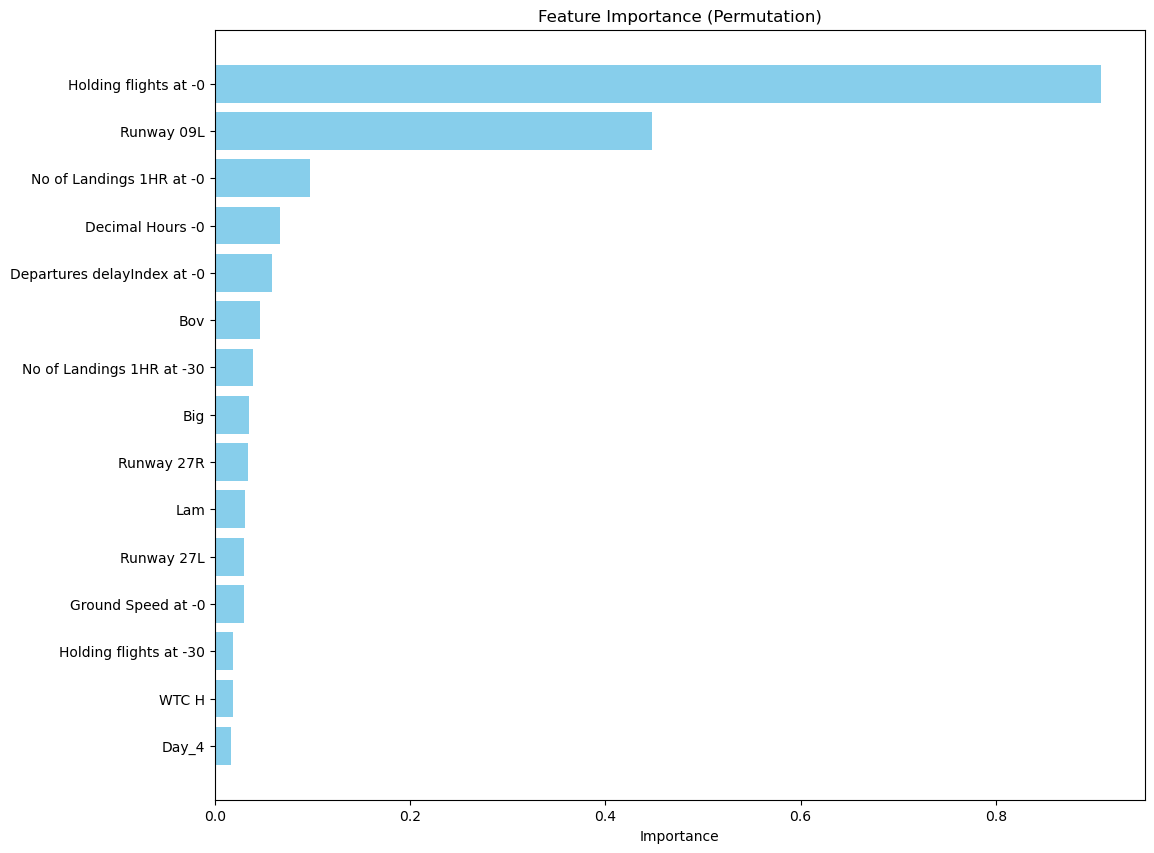

In [16]:
import matplotlib.pyplot as plt


features, importances = zip(*[(str(f), float(i)) for f, i in importances])

# Create a list of features and their importances
feature_importances = list(zip(features, importances))

# Sort the features by their importances in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Select the top 15 features
top_15_features, top_15_importances = zip(*feature_importances[:15])

# Plot the feature importance as a horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(list(top_15_features), list(top_15_importances), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()
